<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

## Load and Prepare Data

In [2]:
data = pd.read_csv('country_vaccinations.csv')
df = data 
df.sample(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
16272,Liechtenstein,LIE,2021-03-06,3128.0,2308.0,820.0,0.0,75.0,8.20,6.05,2.15,1967.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
6539,Croatia,HRV,2021-03-15,NaN,NaN,NaN,NaN,9031.0,NaN,NaN,NaN,2200.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.koronavirus.hr
30749,Wales,OWID_WLS,2021-05-05,2683297.0,1884372.0,798925.0,27025.0,19172.0,85.11,59.77,25.34,6081.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
23684,Saint Helena,SHN,2021-02-06,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,12354.0,Oxford/AstraZeneca,Government of Saint Helena,https://www.sainthelena.gov.sh/2021/news/preli...
10062,Gabon,GAB,2021-04-15,NaN,NaN,NaN,NaN,233.0,NaN,NaN,NaN,105.0,Sinopharm/Beijing,Africa Centres for Disease Control and Prevention,https://covid19.who.int/
5132,Cayman Islands,CYM,2021-02-27,NaN,NaN,NaN,NaN,559.0,NaN,NaN,NaN,8506.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics
15272,Kuwait,KWT,2021-04-21,NaN,NaN,NaN,NaN,15861.0,NaN,NaN,NaN,3714.0,Pfizer/BioNTech,Ministry of Health,https://twitter.com/KUWAIT_MOH/status/14117771...
10294,Georgia,GEO,2021-03-28,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,82.0,Oxford/AstraZeneca,National Center for Disease Control and Public...,https://www.facebook.com/ncdcgeorgia/photos/a....
1593,Australia,AUS,2021-06-23,6860276.0,5745875.0,1114401.0,140892.0,110994.0,26.90,22.53,4.37,4353.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
2903,Belgium,BEL,2021-04-01,2081217.0,1497291.0,585125.0,101702.0,48172.0,17.96,12.92,5.05,4156.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Sciensano,https://epistat.wiv-isp.be/covid/


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [4]:
data_df = pd.read_csv("country_vaccinations.csv")

country_vaccine = data_df.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()
country_vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']



In [5]:
vaccines = country_vaccine.Vaccines.unique()
for v in vaccines:
    countries = country_vaccine.loc[country_vaccine.Vaccines==v, 'Country'].values
    print(f"Vaccines: {v}: \nCountries: {list(countries)}\n")

Vaccines: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing: 
Countries: ['Afghanistan']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V: 
Countries: ['Albania', 'Bosnia and Herzegovina', 'Oman', 'Tunisia']

Vaccines: Oxford/AstraZeneca, Sputnik V: 
Countries: ['Algeria', 'Ghana', 'Guyana', 'Kenya', 'Nicaragua']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech: 
Countries: ['Andorra', 'Australia', 'Bermuda', 'Bhutan', 'Cape Verde', 'Cayman Islands', 'Costa Rica', 'Isle of Man', 'Panama', 'Saudi Arabia', 'Slovenia', 'Sweden']

Vaccines: Oxford/AstraZeneca: 
Countries: ['Angola', 'Anguilla', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Botswana', 'British Virgin Islands', 'Burkina Faso', 'Cook Islands', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Eswatini', 'Ethiopia', 'Falkland Islands', 'Fiji', 'French Polynesia', 'Georgia', 'Grenada', 'Jamaica', 'Kosovo', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Montserrat', 'Nauru', 'Nigeri

کشور                                 country
کد iso                               iso code 
تاریخ                                 date
کل واکسن ها                            total vaccinations
افراد واکسینه شده                          people vaccinated 
افرادی که به طور کامل واکسینه شده اند          people fully vaccinated
واکسیناسیون روزانه_خام                     daily vaccinations_raw    
واکسیناسیون روزانه                        daily vaccinations
کل واکسن ها در هر صد                   total vaccinations per hundred
افراد واکسینه شده در هر صد                 people vaccinated per hundred
افراد کاملاً واکسینه شده در هر صد             people fully vaccinated per hundred
واکسیناسیون روزانه در هر میلیون              daily vaccinations per million
واکسن ها                              vaccines
     

In [6]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [7]:
na_features = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in na_features:
    print(feature,'\t\t', np.round(df[feature].isnull().mean(),3), '%')

total_vaccinations 		 0.441 %
people_vaccinated 		 0.47 %
people_fully_vaccinated 		 0.558 %
daily_vaccinations_raw 		 0.538 %
daily_vaccinations 		 0.009 %
total_vaccinations_per_hundred 		 0.441 %
people_vaccinated_per_hundred 		 0.47 %
people_fully_vaccinated_per_hundred 		 0.558 %
daily_vaccinations_per_million 		 0.009 %


In [8]:
data_column_object = []
for column in df.columns:
    if df[column].dtype == 'object':
        data_column_object.append(column)
data_column_object

['country', 'iso_code', 'date', 'vaccines', 'source_name', 'source_website']

In [9]:
for item in data_column_object:
    print(item)
    print(df[item].value_counts())
    print('-'*30)

country
Norway                             226
Latvia                             224
England                            220
Scotland                           220
Northern Ireland                   215
                                  ... 
Chad                                36
Niue                                16
Pitcairn                             7
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Name: country, Length: 218, dtype: int64
------------------------------
iso_code
NOR         226
LVA         224
OWID_ENG    220
OWID_SCT    220
OWID_NIR    215
           ... 
TCD          36
NIU          16
PCN           7
TKM           1
BES           1
Name: iso_code, Length: 218, dtype: int64
------------------------------
date
2021-06-02    209
2021-06-03    209
2021-06-04    209
2021-06-05    209
2021-06-06    209
             ... 
2020-12-05      2
2020-12-06      2
2020-12-07      2
2020-12-02      1
2020-12-03      1
Name: date, Length: 226, dtype

<Axes: >

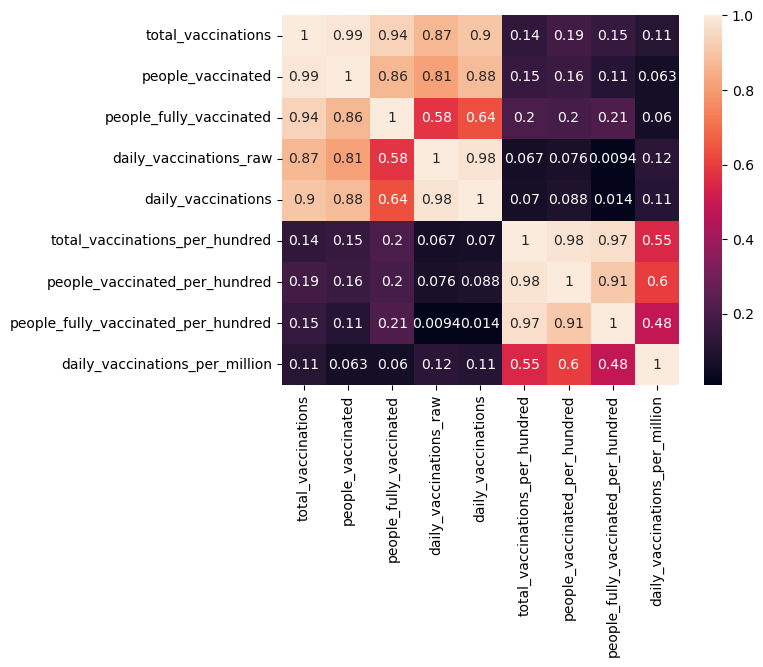

In [10]:
corr = df.corr()
sb.heatmap(corr , annot=True)

## Data Preprocessing

In [11]:
# df = df.fillna(df.mean())
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.000000e+00,0.000000e+00,3.293973e+06,227366.073989,114971.789486,0.000000,0.000000,12.340698,3426.365969,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,Zimbabwe,ZWE,2021-07-11,1.491397e+06,8.959800e+05,5.954170e+05,227366.073989,18598.000000,10.030000,6.030000,4.010000,1251.000000,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31236,Zimbabwe,ZWE,2021-07-12,1.531868e+06,9.263120e+05,6.055560e+05,40471.000000,23205.000000,10.310000,6.230000,4.070000,1561.000000,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31237,Zimbabwe,ZWE,2021-07-13,1.575539e+06,9.556560e+05,6.198830e+05,43671.000000,27567.000000,10.600000,6.430000,4.170000,1855.000000,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31238,Zimbabwe,ZWE,2021-07-14,1.613640e+06,9.887460e+05,6.248940e+05,38101.000000,30698.000000,10.860000,6.650000,4.200000,2065.000000,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [12]:
df.date = pd.to_datetime(df.date)

In [13]:
df.date

0       2021-02-22
1       2021-02-23
2       2021-02-24
3       2021-02-25
4       2021-02-26
           ...    
31235   2021-07-11
31236   2021-07-12
31237   2021-07-13
31238   2021-07-14
31239   2021-07-15
Name: date, Length: 31240, dtype: datetime64[ns]

## Strorytelling - Visualization

In [14]:
display(df[df["vaccines"]=="Pfizer/BioNTech"][['country','iso_code','date','vaccines','total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','source_name']].sort_values(by="total_vaccinations", ascending= False).head(10).style.background_gradient(cmap="CMRmap_r"))

,country,iso_code,date,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name
18415,Monaco,MCO,2021-04-03 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,176.000000,29.283554,19.181574,12.340698,4485.000000,National Council
18402,Monaco,MCO,2021-03-21 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,167.000000,29.283554,19.181574,12.340698,4255.000000,National Council
18432,Monaco,MCO,2021-04-20 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,200.000000,29.283554,19.181574,12.340698,5096.000000,National Council
18433,Monaco,MCO,2021-04-21 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,203.000000,29.283554,19.181574,12.340698,5173.000000,National Council
29048,Turks and Caicos Islands,TCA,2021-04-21 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,163.000000,29.283554,19.181574,12.340698,4210.000000,World Health Organization
18435,Monaco,MCO,2021-04-23 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,191.000000,29.283554,19.181574,12.340698,4867.000000,National Council
18436,Monaco,MCO,2021-04-24 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,176.000000,29.283554,19.181574,12.340698,4485.000000,National Council
18437,Monaco,MCO,2021-04-25 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,161.000000,29.283554,19.181574,12.340698,4103.000000,National Council
18438,Monaco,MCO,2021-04-26 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,146.000000,29.283554,19.181574,12.340698,3720.000000,National Council
18439,Monaco,MCO,2021-04-27 00:00:00,Pfizer/BioNTech,12004435.249842,5704550.528452,3293973.392896,227366.073989,132.000000,29.283554,19.181574,12.340698,3364.000000,National Council


In [15]:
fig = px.choropleth(locations=country_vaccine['Country'], 
                    locationmode="country names",
                    color=country_vaccine['Vaccines'],
                    title="Countries using each vaccine (different colors for each vaccine)",
                    height = 800
                   )
fig.update_layout({'legend_orientation':'v'})
fig.update_layout({'legend_title':'Vaccine scheme'})
fig.show()



In [16]:
vaccine = data_df.groupby(["vaccines"])['total_vaccinations','total_vaccinations_per_hundred',
                                       'daily_vaccinations','daily_vaccinations_per_million'].max().reset_index()
vaccine.columns = ["Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million"]
def draw_trace_bar_vaccine(data, feature, title, xlab, ylab,color='Blue'):
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data['Vaccines'],
            y = data[feature],
            marker=dict(color=color),
            text=data['Vaccines']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='black'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest',
              height = 800
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

In [17]:
draw_trace_bar_vaccine(vaccine, 'Total vaccinations', 'Total per vaccine scheme', 'Vaccine', 'Vaccination total', "darkmagenta" )

In [18]:


fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'Total vaccinations',
                title="Total vaccinations per country, grouped by vaccine scheme")
fig.show()



## Prepare Data for Machine learning

In [19]:
df = df.drop(['source_name', 'source_website'],axis=1)

In [20]:
data_column_object = []
for column in df.columns:
    if df[column].dtype == 'object':
        data_column_object.append(column)
data_column_object

['country', 'iso_code', 'vaccines']

In [21]:
for item in data_column_object:
    df[item] = pd.factorize(df[item])[0]
    df[item] = df[item].astype('category')

In [22]:

a =df.date.sample()
print(a)
pd.to_datetime('2021-06-01').value


29939   2021-03-21
Name: date, dtype: datetime64[ns]


1622505600000000000

In [23]:
df['date'] = df['date'].apply(lambda x: x.value)

In [25]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,0,0,1613952000000000000,0.000000e+00,0.000000e+00,3.293973e+06,227366.073989,114971.789486,0.000000,0.000000,12.340698,3426.365969,0
1,0,0,1614038400000000000,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,0
2,0,0,1614124800000000000,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,0
3,0,0,1614211200000000000,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,0
4,0,0,1614297600000000000,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,217,217,1625961600000000000,1.491397e+06,8.959800e+05,5.954170e+05,227366.073989,18598.000000,10.030000,6.030000,4.010000,1251.000000,19
31236,217,217,1626048000000000000,1.531868e+06,9.263120e+05,6.055560e+05,40471.000000,23205.000000,10.310000,6.230000,4.070000,1561.000000,19
31237,217,217,1626134400000000000,1.575539e+06,9.556560e+05,6.198830e+05,43671.000000,27567.000000,10.600000,6.430000,4.170000,1855.000000,19
31238,217,217,1626220800000000000,1.613640e+06,9.887460e+05,6.248940e+05,38101.000000,30698.000000,10.860000,6.650000,4.200000,2065.000000,19


In [46]:
x = df[['country', 'date',  'people_vaccinated', 'vaccines', 'daily_vaccinations', 'people_fully_vaccinated']]
y = df['total_vaccinations']

In [47]:
X = np.asanyarray(x)
Y = np.asanyarray(y) 

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=1 )

In [49]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

## Train your model

In [50]:
from sklearn.linear_model import LinearRegression
rg_model = LinearRegression()
rg_model.fit(x_train, y_train)

LinearRegression()

## Test the model and show the metrics

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# for train
train_predict = rg_model.predict(x_train)

print('r2 score for train is : ', r2_score(train_predict, y_train))
print('mean_absolute_error for train is : ', mean_absolute_error(train_predict, y_train))
print('mean_squared_error for train is : ', mean_squared_error(train_predict, y_train))
#------------------
print("-"*30)
# for test

test_predict = rg_model.predict(x_test)

print('r2 score for test is : ', r2_score(test_predict, y_test))
print('mean_absolute_error for test is : ', mean_absolute_error(test_predict, y_test))
print('mean_squared_error for test is : ', mean_squared_error(test_predict, y_test))

r2 score for train is :  0.8329278005024988
mean_absolute_error for train is :  5544562.668586923
mean_squared_error for train is :  316291129307243.44
------------------------------
r2 score for test is :  0.8186454847148973
mean_absolute_error for test is :  5623818.9905007165
mean_squared_error for test is :  428815293748924.44


## Save Model

In [52]:
from joblib import dump
dump(rg_model, 'models_trained\ rg_model.pkl')

['models_trained\\ rg_model.pkl']

## Send us the Result (Maktabkhoone)